<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M6L6_Data_acquisition_and_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data acquisition and processing

[PPT M6L6 ENG](https://docs.google.com/presentation/d/1klFaevKGKD2XERqcbl8PERf4FA3IA13moIxJPc-_zZ4/edit?usp=sharing)

# GET and POST methods

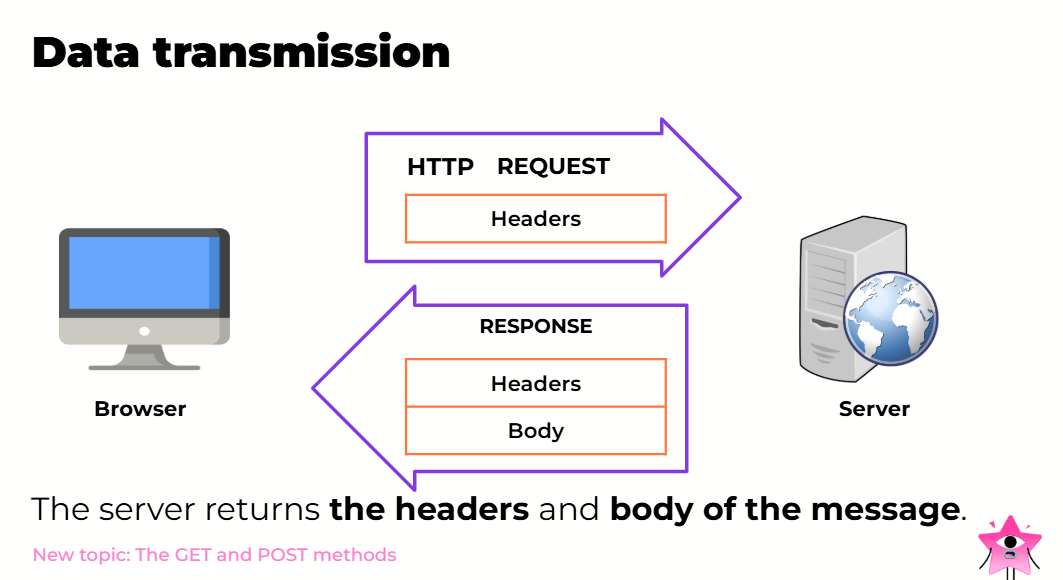

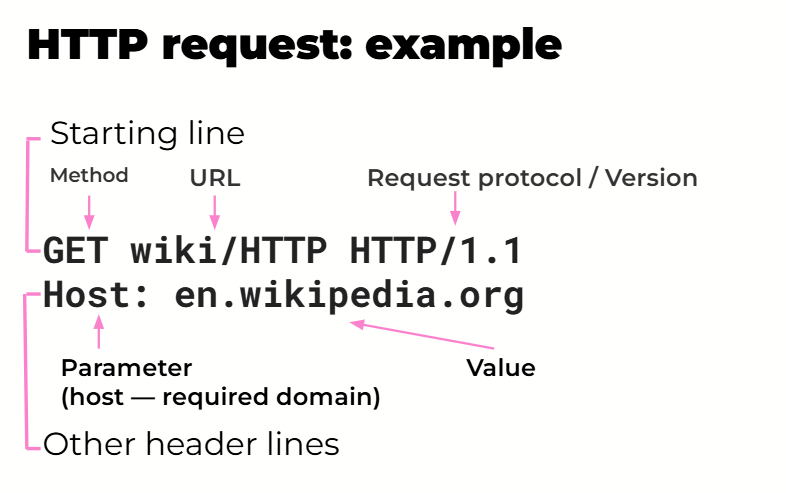

## transfer data

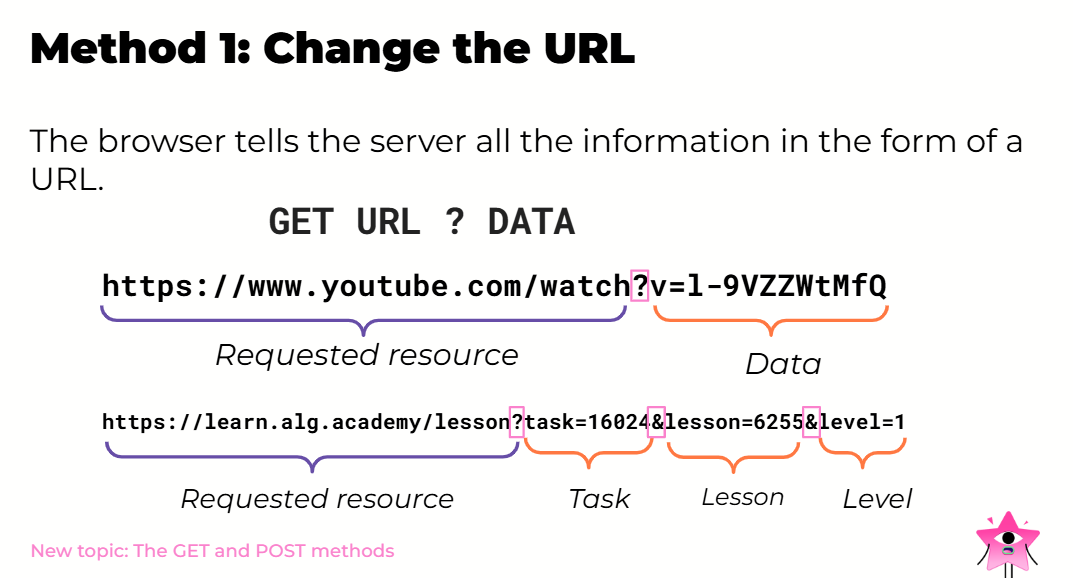

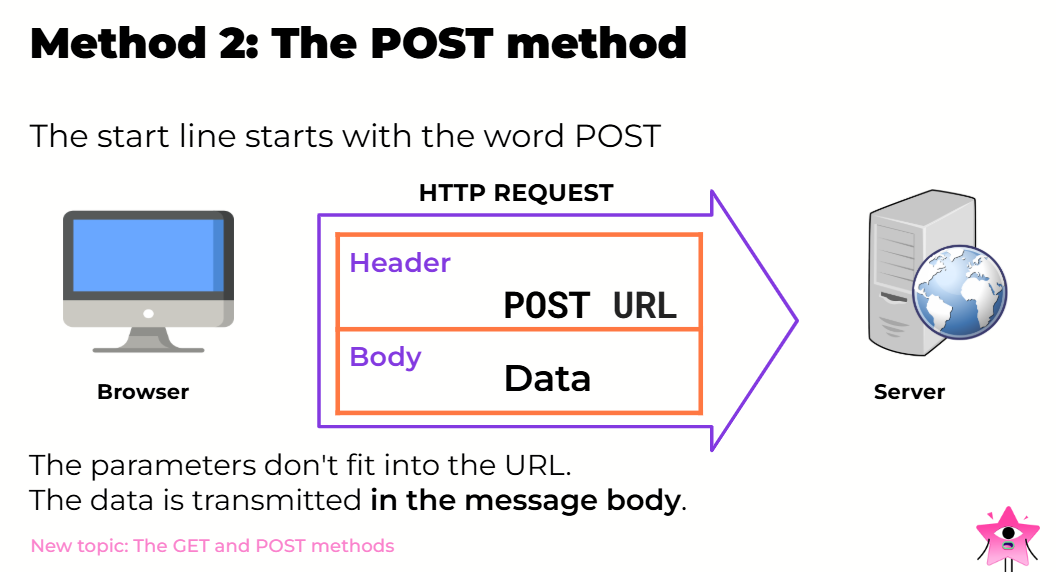

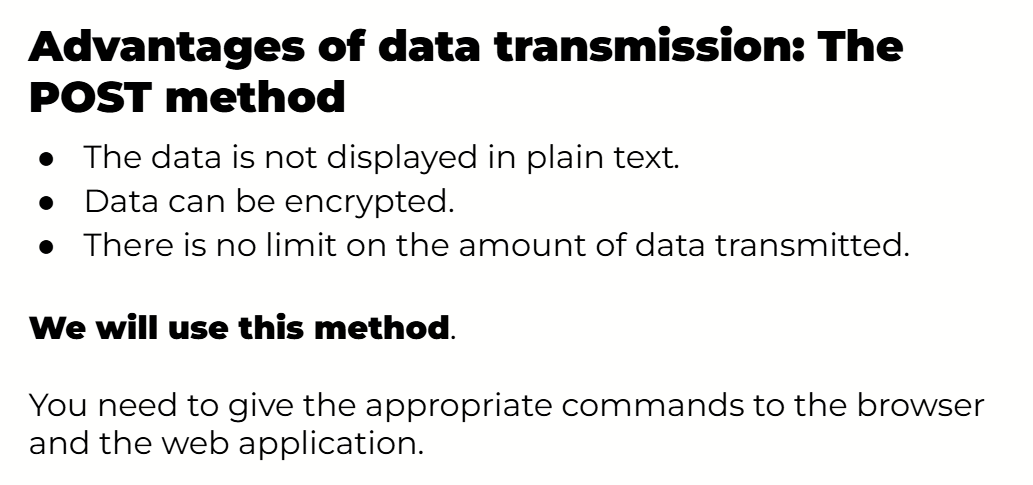

# HTML forms

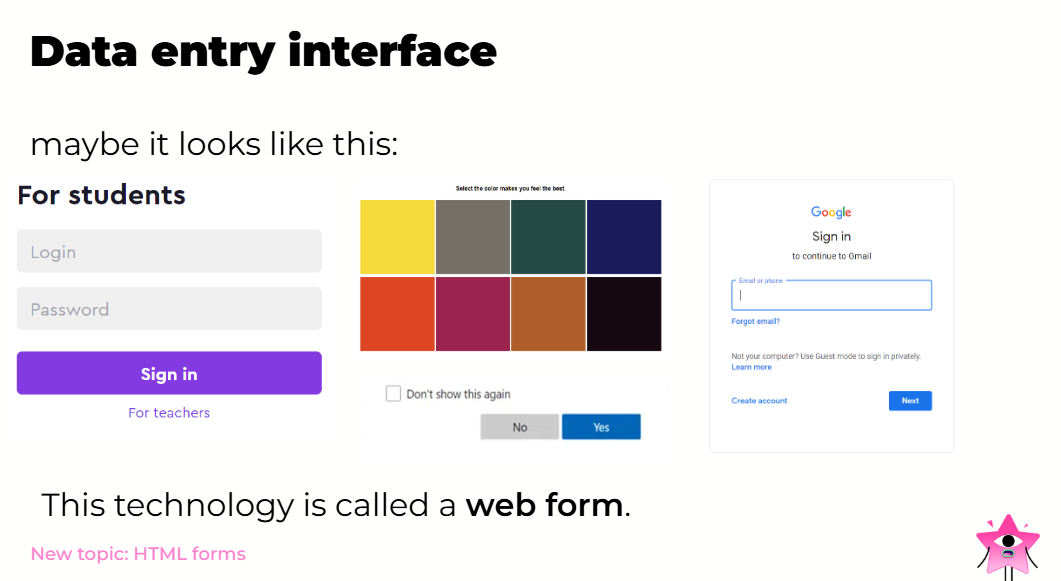

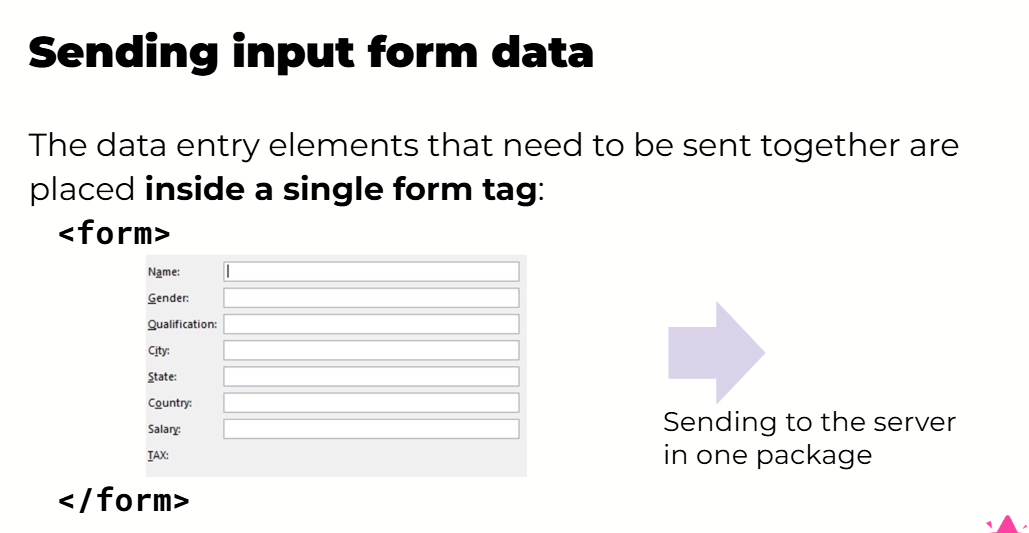

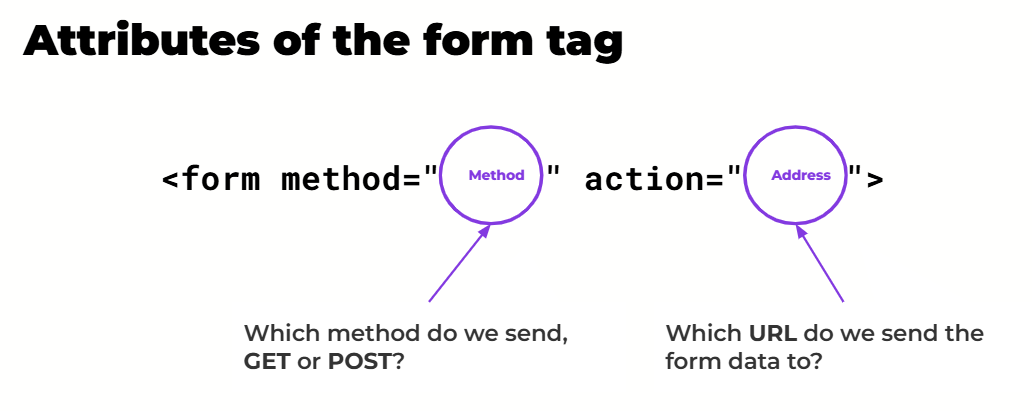

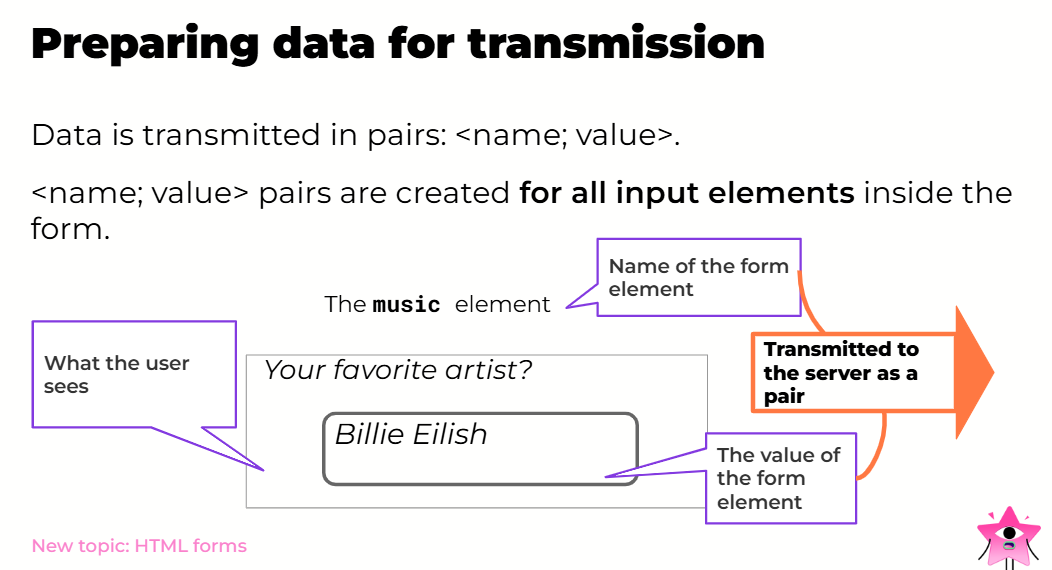

## Data entry elements

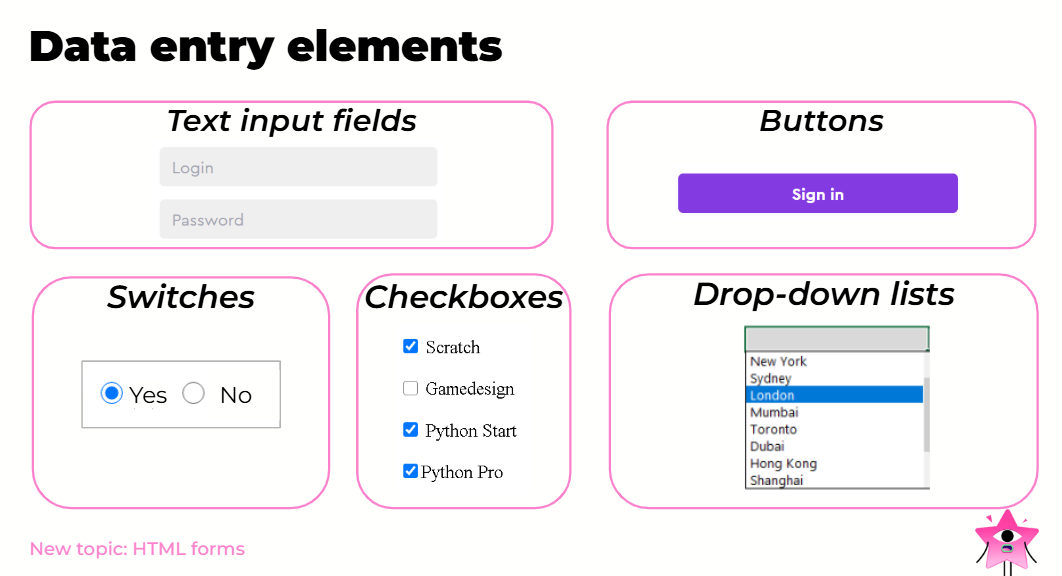

### text fields

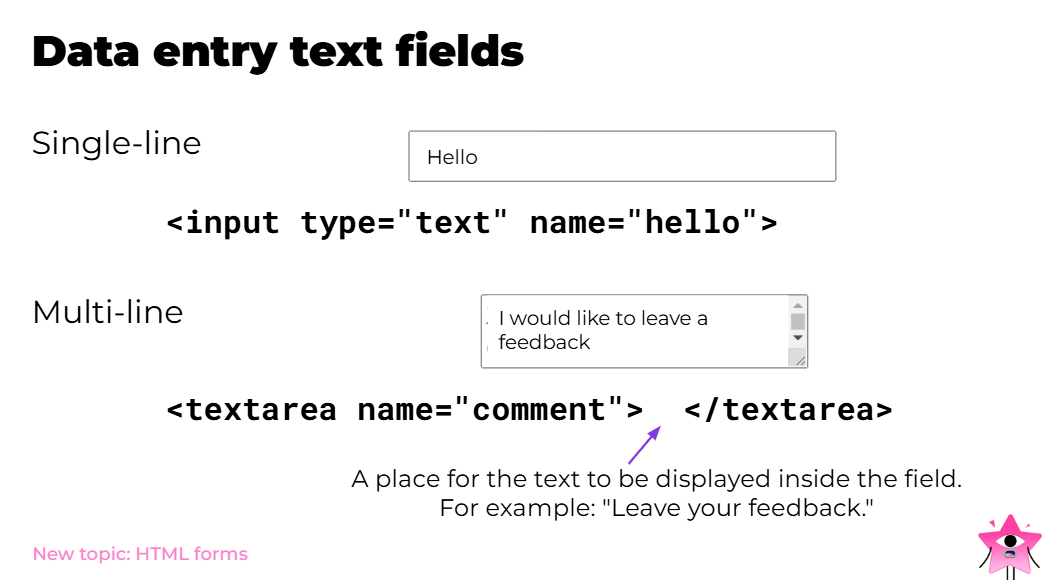



```
<input type="text" name="hello">

<textarea name="comment">  </textarea>

```



### switch / radio button

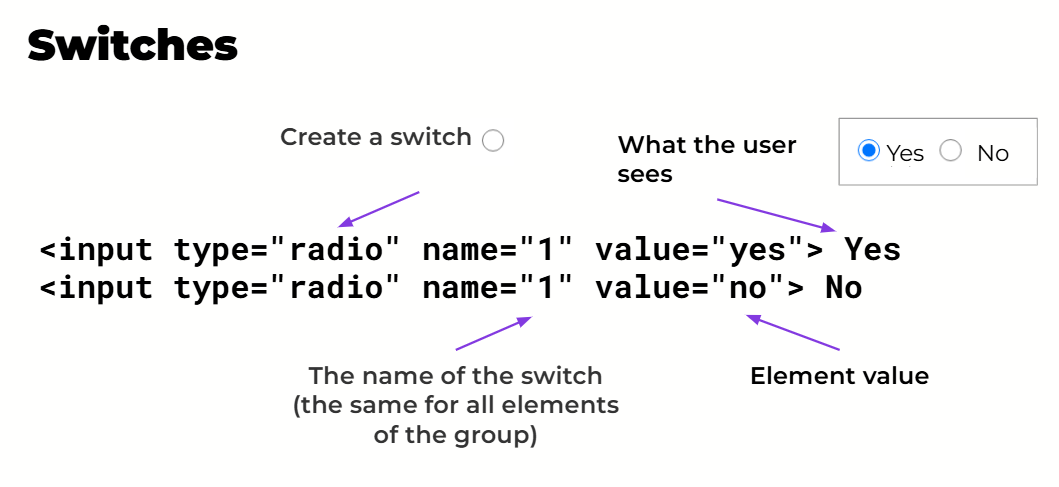



```
<input type="radio" name="1" value="yes"> Yes
<input type="radio" name="1" value="no"> No

```



### checkbox

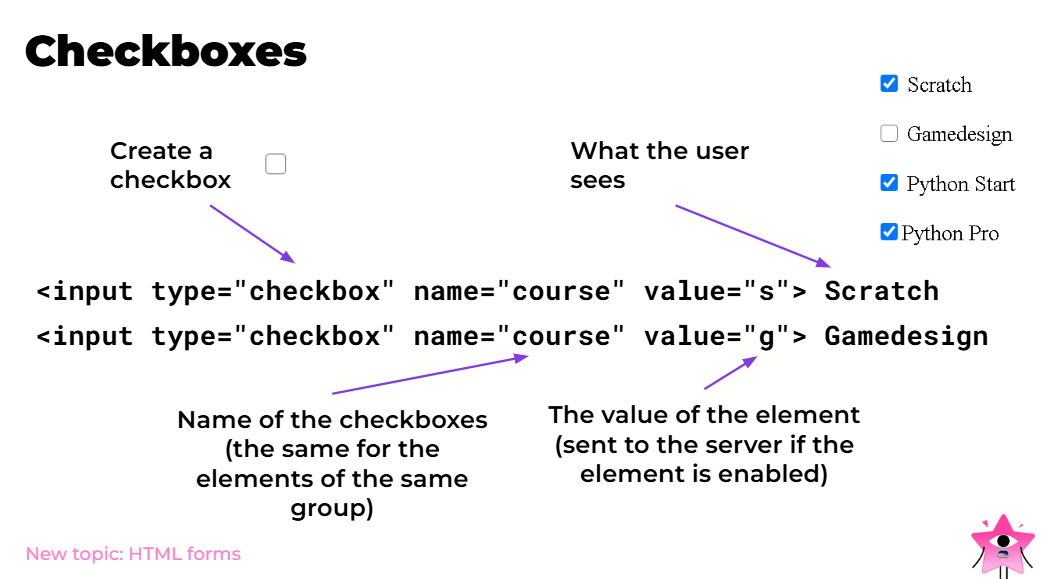



```
<input type="checkbox" name="course" value="s"> Scratch
<input type="checkbox" name="course" value="g"> Gamedesign

```



### dropdown list

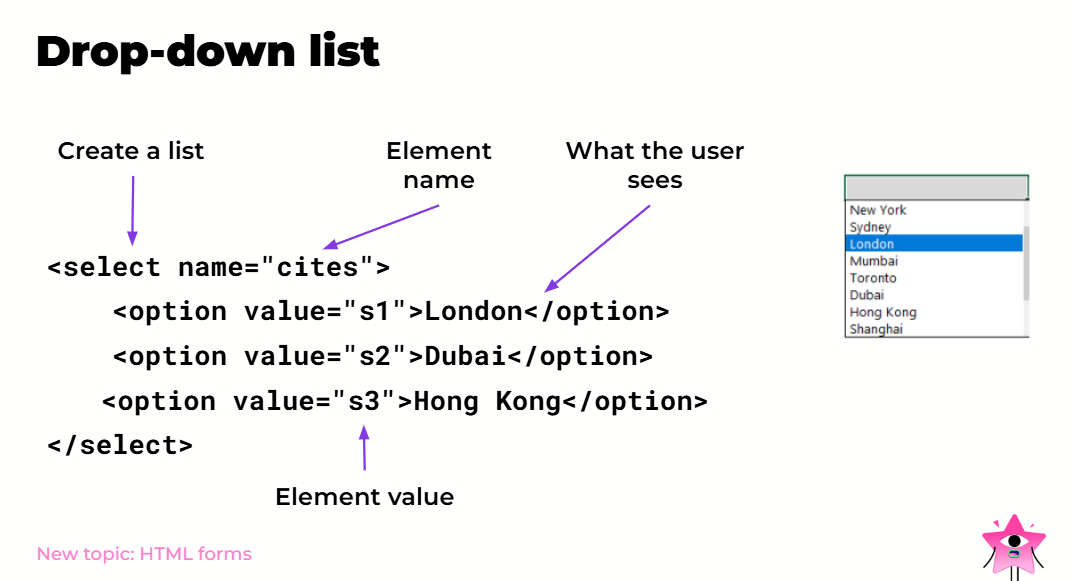



```
<select name="cites">
    <option value="s1">London</option>
    <option value="s2">Dubai</option>
    <option value="s3">Hong Kong</option>
</select>


```



### data transfer button

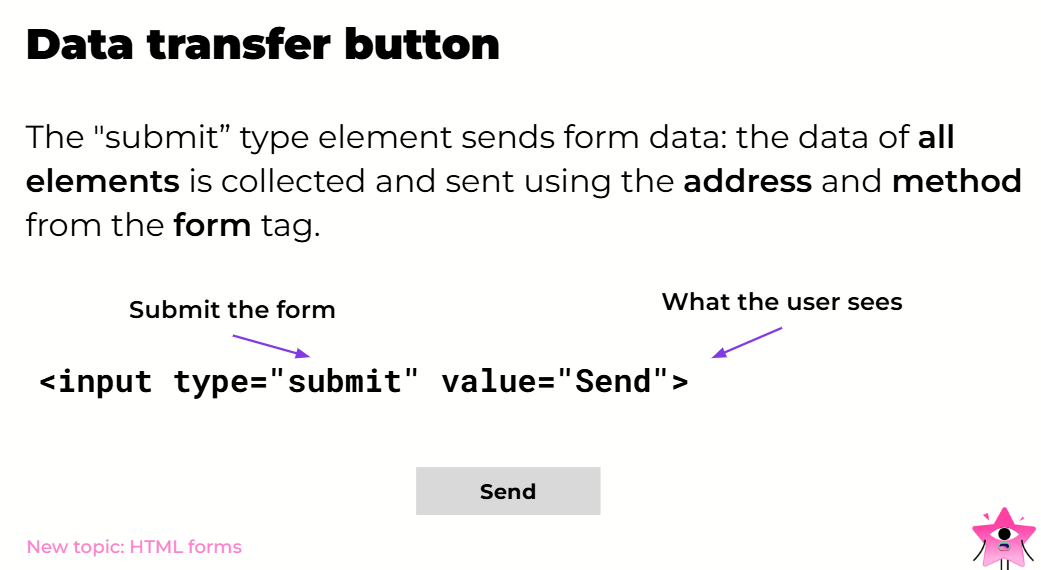



```
<input type="submit" value="Send">

```



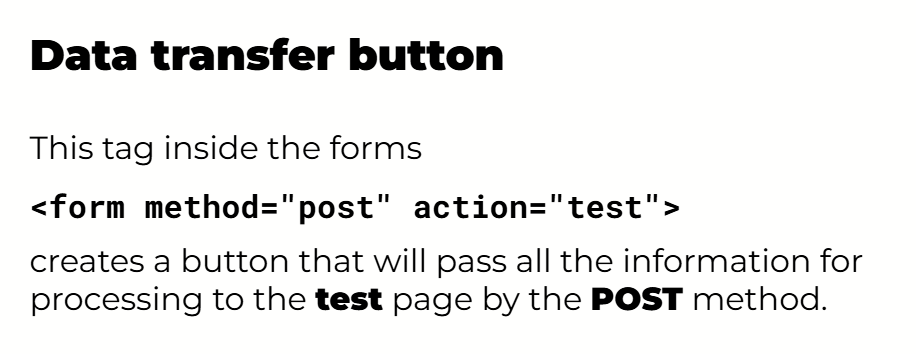



```
<form method="post" action="test">

```



# Processing received data


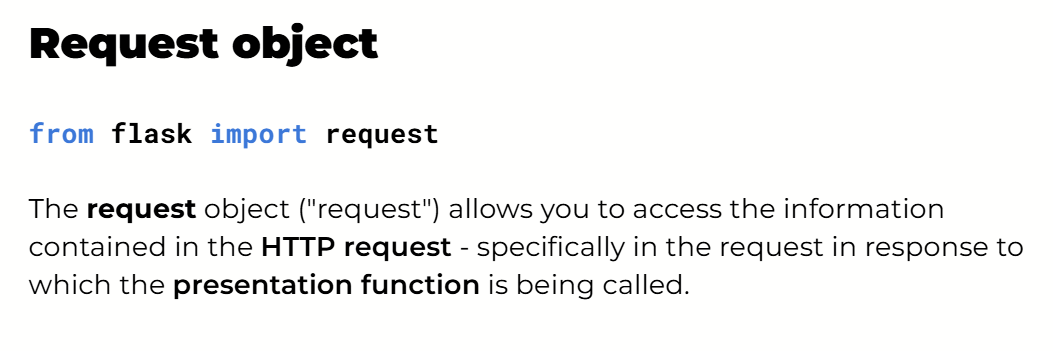

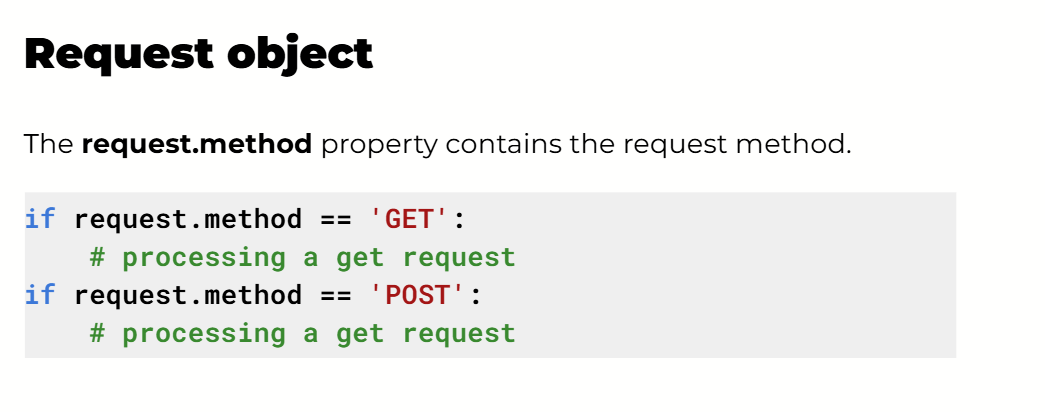

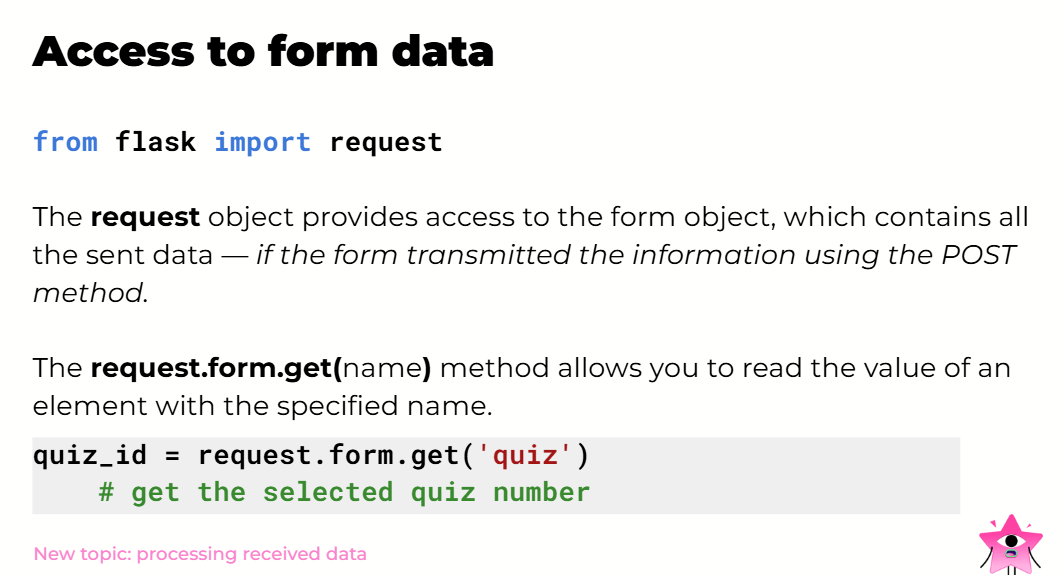

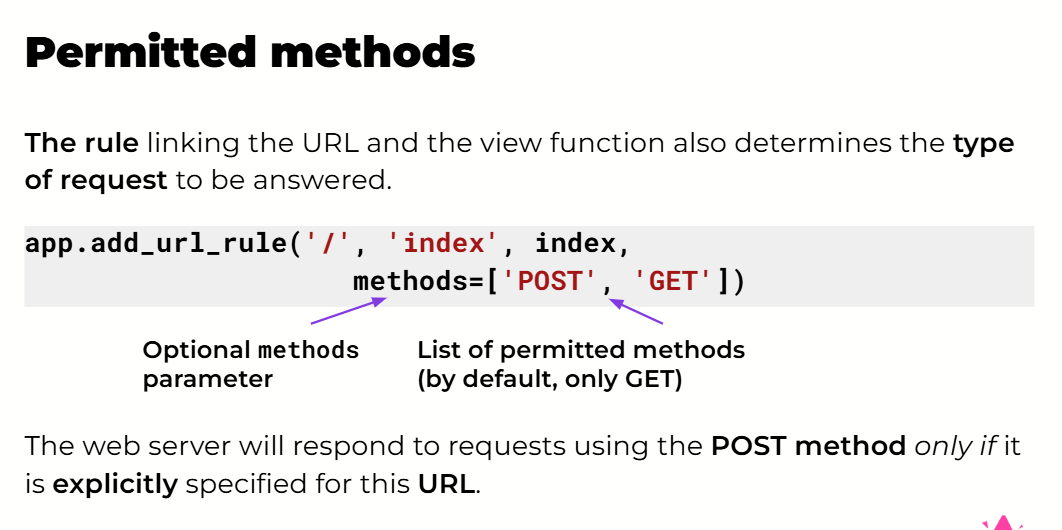

# Solutions

## 1



```
<!DOCTYPE html>
<html>
 <head>
  <title>Questionnaire</title>
 </head>
 <body>
  <form method="post" action="program">
    <p><h2>Fill out the questionnaire:</h2>
    <p><b>Your name:</b>      
    <input type="text" maxlength="25" size="25" ></p>
    <p><b>Your last name:</b>      
    <input type="text" maxlength="25" size="25" ></p>
    <p><b>Your age:</b>      
    <input type="number" name="age" value="10" min="10" max="18" step="1"></p>
    <p><b>Choose the courses that interest you:</b>          
    <p><input type="checkbox" name="course" value="Scratch"> Scratch</p>
    <p><input type="checkbox" name="course" value="Gamedesign"> Gamedesign</p>
    <p><input type="checkbox" name="course" value="Python Start"> Python Start</p>
    <p><input type="checkbox" name="course" value="Python Pro">Python Pro</p>  
    <p><b>Additional comment:</b>
    <textarea name="comment"></textarea></p>
    <p><input type="submit" value="Send"></p>

  </form>
</body>
</html>
```



## 2



```
<!DOCTYPE html>
<html>
 <head>
  <title>Authorization</title>
 </head>
 <body>
    <form method="post" action="program">
    <p><h3>Fill out the authorization form:</h3>
    <p><input name="login" placeholder="Login"></p>
    <p><input name="pass" type="password" placeholder="Password"></p>
    <p><input type="submit" value="Login"> <input type="reset" value="Clear"></p>
   
    </form>
 </body>
</html>
```



## 3



```
<!DOCTYPE html>
<html>
 <head>
  <title>Flight</title>
 </head>
 <body>
    <form method="post" action="program">
    <p><h2>Flight search</h2></p>
    <p><b>Your name:</b>    
    <input type="text" maxlength="25" size="25"></p>
    <p><b>Your last name:</b>
    <input type="text" maxlength="25" size="25"></p>
    <p><b>Your gender:</b> <input type="radio" name="gender" value="Male">Male <input type="radio" name="gender" value="Female">Female</p>
    <p><b>Choose a city:</b>
        <select name="cites">
        <option value="New York">New York</option>
        <option value="Los Angeles">Los Angeles</option>
        <option value="London">London</option>
        <option value="Beijing">Beijing</option>
        <option value="Tokyo">Tokyo</option>
        <option value="Seul">Seul</option>
    </select>  </p>
   
   <p><b>Select a date:</b> <input type="date" name="calendar"></p>
   <p><b>Select the desired time:</b> <input type="time" name="time" value="00:00"></p>
   <p><input type="submit" value="Search"> </p>

    </form>
 </body>
</html>
```



## 4



```
<!DOCTYPE html>
<html>
 <head>
  <title>Website</title>
 </head>
 <body>
    <form method="post" action="program">
   <p><h2>Website Design</h2></p>
   <p><b>Preferred color palette:</b> </p>
   <p> <input type="radio" name="gender"  value="1">Bright colors</p>
    <p><input type="radio" name="gender"  value="2">Pastel colors</p>

    <p><b>We would like to see these colors on our website (check the box if "yes"):</b></p>
   <p><input type="checkbox" name="color" value="White">White</p>
   <p><input type="checkbox" name="color" value="Black">Black</p>
   <p><input type="checkbox" name="color" value="Purple">Purple</p>
   <p><input type="checkbox" name="color" value="Yellow">Yellow</p>
   <p><input type="checkbox" name="color" value="Red">Red</p>

   <p><b>Specify the primary color:</b> <input type="color" name="color" value="#ff0000"></p>  

   <p><input type="submit" value="Order"> </p>  

  </form>
 </body>
</html>
```



## quiz.py

In [ ]:
from flask import Flask, session, request, redirect, url_for
from db_scripts import get_question_after, get_quises
def start_quis(quiz_id):
    '''creates the desired values in the session dictionary'''
    session['quiz'] = quiz_id
    session['last_question'] = 0

def end_quiz():
    session.clear()

def quiz_form():
    '''the function gets a list of quizzes from the database and formulates a form with a drop-down list'''
    html_beg = '''<html><body><h2>Choose a quiz:</h2><form method="post" action="index"><select name="quiz">'''
    frm_submit = '''<p><input type="submit" value="Select"> </p>'''

    html_end = '''</select>''' + frm_submit + '''</form></body></html>'''
    options = ''' '''
    q_list = get_quises()
    for id, name in q_list:
        option_line = ('''<option value="''' +
                        str(id) + '''">''' +
                        str(name) + '''</option>
                      ''')
        options = options + option_line
    return html_beg + options + html_end

def index():
    '''First page: if it came with a GET request, then choose a quiz,
    if POST, then remember the quiz ID and send it to the questions'''
    if request.method == 'GET':
        # the quiz is not selected, reset the quiz id and show the selection form
        start_quis(-1)
        return quiz_form()
    else:
        # received additional data in the request! Use them:
        quest_id = request.form.get('quiz') # selected quiz number
        start_quis(quest_id)
        return redirect(url_for('test'))

def test():
    '''returns the question page'''
    # what if a user without choosing a quiz went straight to the address '/test'?
    if not ('quiz' in session) or int(session['quiz']) < 0:
        return redirect(url_for('index'))
    else:
        # there is still an old version of the function:
        result = get_question_after(session['last_question'], session['quiz'])
        if result is None or len(result) == 0:
            return redirect(url_for('result'))
        else:
            session['last_question'] = result[0]
            # if we've taught the database to return Row or dict, then we shouldn't write result[0] and instead write result['id']
            return '<h1>' + str(session['quiz']) + '<br>' + str(result) + '</h1>'

def result():
    end_quiz()
    return "that's all folks!"

# Creating a web application object:
app = Flask(__name__)
app.add_url_rule('/', 'index', index) # creates a rule for the URL '/'
app.add_url_rule('/index', 'index', index, methods=['post', 'get']) # rule for '/index'
app.add_url_rule('/test', 'test', test) # creates a rule for the URL '/test'
app.add_url_rule('/result', 'result', result) # creates a rule for the URL '/test'
# Setting the encryption key:
app.config['SECRET_KEY'] = 'ThisIsSecretSecretSecretLife'

if __name__ == "__main__":
    # Starting the web server:
    app.run()


## db_scripts.py

In [ ]:
import sqlite3
from random import randint

db_name = 'quiz.sqlite'
conn = None
cursor = None

def open():
    global conn, cursor
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

def close():
    cursor.close()
    conn.close()

def do(query):
    cursor.execute(query)
    conn.commit()

def clear_db():
    '''kills all tables'''
    open()
    query = '''DROP TABLE IF EXISTS quiz_content'''
    do(query)
    query = '''DROP TABLE IF EXISTS question'''
    do(query)
    query = '''DROP TABLE IF EXISTS quiz'''
    do(query)
    close()

def create():
    open()
    cursor.execute('''PRAGMA foreign_keys=on''')

    do('''CREATE TABLE IF NOT EXISTS quiz (
            id INTEGER PRIMARY KEY,
            name VARCHAR)'''
    )
    do('''CREATE TABLE IF NOT EXISTS question (
                id INTEGER PRIMARY KEY,
                question VARCHAR,
                answer VARCHAR,
                wrong1 VARCHAR,
                wrong2 VARCHAR,
                wrong3 VARCHAR)'''
    )
    do('''CREATE TABLE IF NOT EXISTS quiz_content (
                id INTEGER PRIMARY KEY,
                quiz_id INTEGER,
                question_id INTEGER,
                FOREIGN KEY (quiz_id) REFERENCES quiz (id),
                FOREIGN KEY (question_id) REFERENCES question (id) )'''
    )
    close()

def show(table):
    query = 'SELECT * FROM ' + table
    open()
    cursor.execute(query)
    print(cursor.fetchall())
    close()

def show_tables():
    show('question')
    show('quiz')
    show('quiz_content')

def add_questions():
    questions = [
        ('How many months in a year have 28 days?', 'All', 'One', 'None','Two'),
        ('What will the green cliff look like if it falls into the Red Sea?', 'Wet', 'Red', 'Will not change', 'Purple'),
        ('Which hand is better to stir tea with?', 'With a spoon', 'Right', 'Left', 'Any'),
        ('What has no length, depth, width, or height, but can be measured?', 'Time', 'Stupidity', 'The sea','Air'),
        ('When is it possible to draw out water with a net?', 'When the water is frozen', 'When there are no fish', 'When the goldfish swim away', 'When the net breaks'),
        ('What is bigger than an elephant and weighs nothing?', 'Shadow of elephant','A balloon','A parachute', 'A cloud')
    ]
    open()
    cursor.executemany('''INSERT INTO question (question, answer, wrong1, wrong2, wrong3) VALUES (?,?,?,?,?)''', questions)
    conn.commit()
    close()

def add_quiz():
    quizes = [
        ('Quiz 1', ),
        ('Quiz 2', ),
        ('Quiz- do not understand which', )
    ]
    open()
    cursor.executemany('''INSERT INTO quiz (name) VALUES (?)''', quizes)
    conn.commit()
    close()

def add_links():
    open()
    cursor.execute('''PRAGMA foreign_keys=on''')
    query = "INSERT INTO quiz_content (quiz_id, question_id) VALUES (?,?)"
    answer = input("Add a link (y/n)?")
    while answer != 'n':
        quiz_id = int(input("quiz id: "))
        question_id = int(input("question id: "))
        cursor.execute(query, [quiz_id, question_id])
        conn.commit()
        answer = input("Add a link (y/n)?")
    close()


def get_question_after(last_id=0, vict_id=1):
    '''returns the next question after the question with the passed ID
    for the first question, the default value is passed'''
    open()
    query = '''
    SELECT quiz_content.id, question.question, question.answer, question.wrong1, question.wrong2, question.wrong3
    FROM question, quiz_content
    WHERE quiz_content.question_id == question.id
    AND quiz_content.id > ? AND quiz_content.quiz_id == ?
    ORDER BY quiz_content.id '''
    cursor.execute(query, [last_id, vict_id] )

    result = cursor.fetchone()
    close()
    return result

def get_quises():
    '''returns a list of quizzes (id, name)
    you can only take quizzes in which there are questions, but so far a simple option'''
    query = 'SELECT * FROM quiz ORDER BY id'
    open()
    cursor.execute(query)
    result = cursor.fetchall()
    close()
    return result
def get_quiz_count():
    "' optional function '"
    query = 'SELECT MAX(quiz_id) FROM quiz_content'
    open()
    cursor.execute(query)
    result = cursor.fetchone()
    close()
    return result
def get_random_quiz_id():
    query = 'SELECT quiz_id FROM quiz_content'
    open()
    cursor.execute(query)
    ids = cursor.fetchall()
    rand_num = randint(0, len(ids) - 1)
    rand_id = ids[rand_num][0]
    close()
    return rand_id
def main():
    clear_db()
    create()
    add_questions()
    add_quiz()
    show_tables()
    add_links()
    show_tables()
    # print(get_question_after(0, 3))
    # print(get_quiz_count())
    # print(get_random_quiz_id())
    pass


if __name__ == "__main__":
    main()
